In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [7]:
df = pd.read_csv("C:/Users/91896/Pictures/Uni Work/Disease Predictor/data/heart_disease_uci.csv")

In [8]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [10]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [12]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

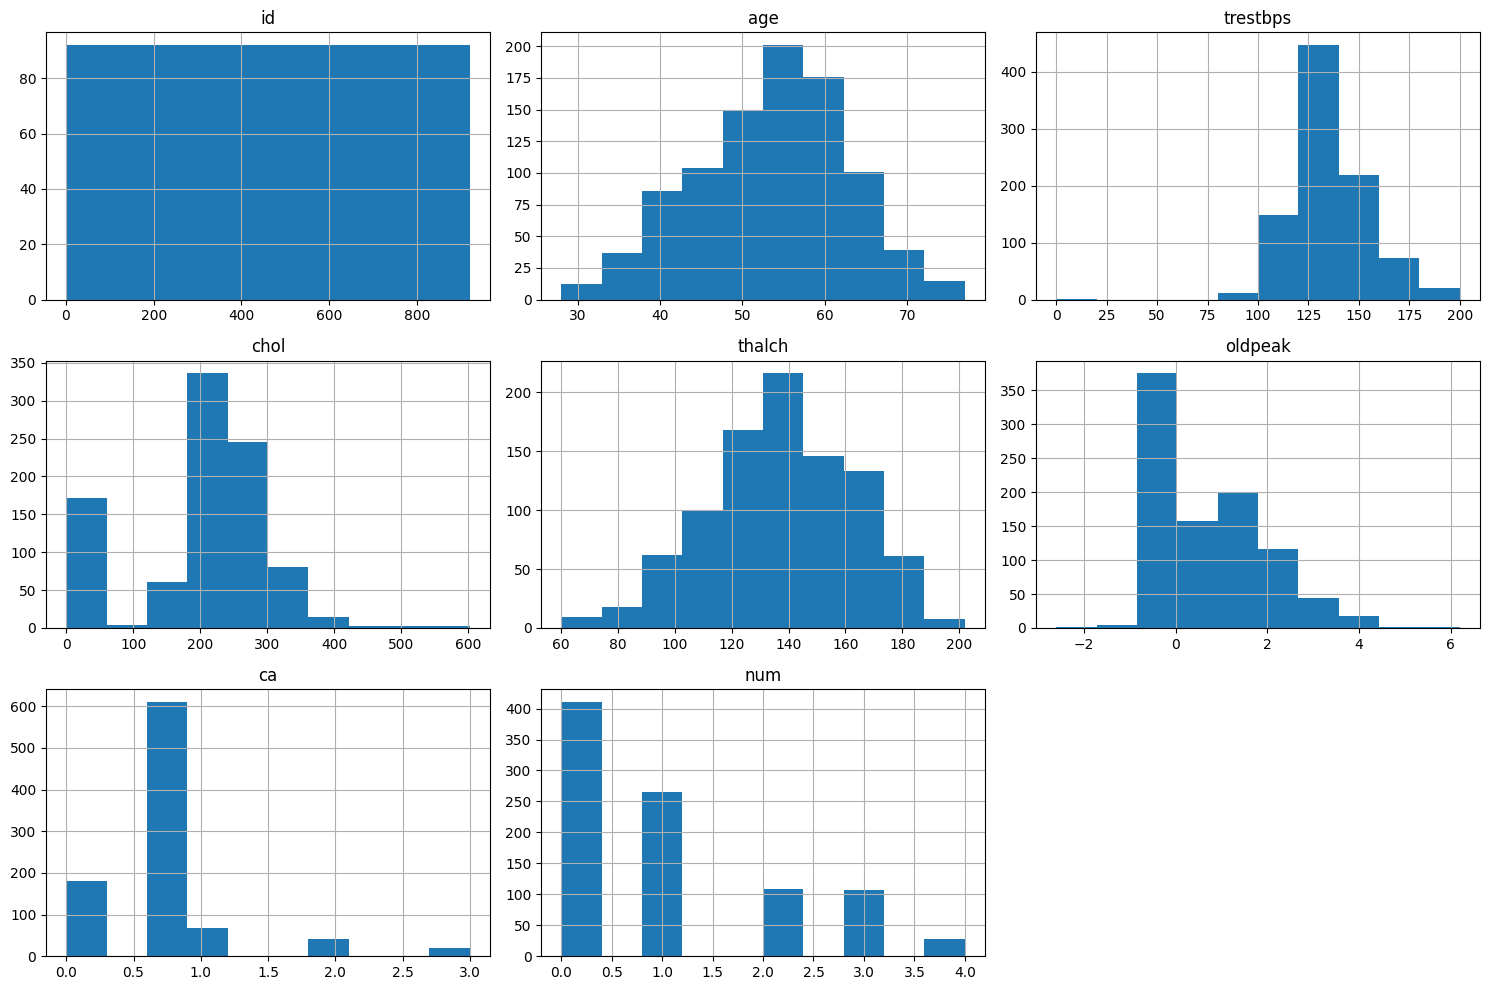

In [13]:
df[numeric_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

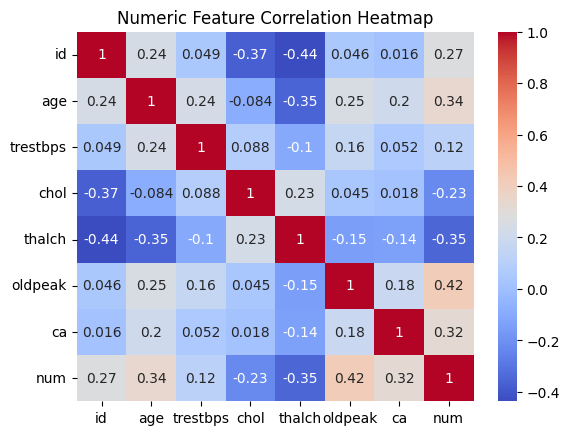

In [14]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlation Heatmap')
plt.show()

In [15]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
    cat_cols.remove('num')

In [16]:
x = df.drop('num', axis=1)
y = (df['num'] > 0).astype(int)

In [17]:
X = pd.get_dummies(x, columns=cat_cols)
print("Final feature columns", X.columns)

Final feature columns Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [20]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
from sklearn.metrics import accuracy_score , classification_report

In [24]:
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [25]:
from sklearn.metrics import confusion_matrix

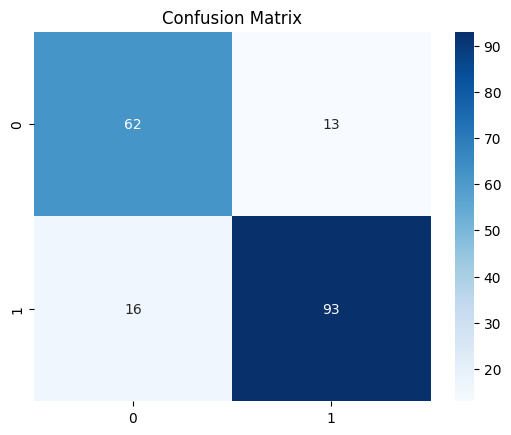

In [26]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8858695652173914


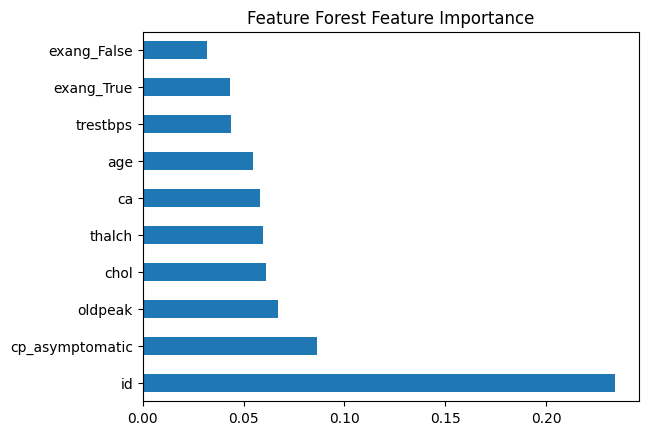

In [29]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Feature Forest Feature Importance')
plt.show()

In [37]:
import os

os.makedirs("models", exist_ok=True)
import joblib
joblib.dump(rf_model, "models/heart_rf_model.pkl")
joblib.dump(scalar,'models/scalar.pkl')

['models/scalar.pkl']

In [38]:
sample = X.head(1)
sample.to_csv('Heart_user_template.csv', index=False)
print("User Template saved as 'Heart_user_template.csv' ")

User Template saved as 'Heart_user_template.csv' 


In [41]:
user_df = df = pd.read_csv("C:/Users/91896/Pictures/Uni Work/Disease Predictor/data/heart_disease_uci.csv")

In [42]:
#Getting columns list from training dataframe
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

In [43]:
#Dropping columns which are extra in user_df than required to avoid error
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]


In [45]:
user_df[numeric_cols] = user_df[numeric_cols].fillna(user_df[numeric_cols].mean())
for col in cat_cols:
    user_df[col] = user_df[col].fillna('Unknown')

for col in bool_cols:
    user_df[col] = user_df[col].astype(int)


In [46]:
#One-hot encoding cat columns
user_df_encoded=pd.get_dummies(user_df, columns=cat_cols)


In [47]:
#Align columns
user_df_encoded = user_df_encoded.reindex(columns=X.columns, fill_value=0)

In [49]:
#Scale data
scalar = joblib.load('models/scalar.pkl')
user_df_scaled = scalar.transform(user_df_encoded)

In [51]:
#Prediction
model = joblib.load('models/heart_rf_model.pkl')
prediction = model.predict(user_df_scaled)
preds=model.predict(user_df_scaled)
user_df['heart_Disease_Prediction'] = preds
print(user_df)

      id  age     sex        dataset               cp    trestbps   chol  \
0      1   63    Male      Cleveland   typical angina  145.000000  233.0   
1      2   67    Male      Cleveland     asymptomatic  160.000000  286.0   
2      3   67    Male      Cleveland     asymptomatic  120.000000  229.0   
3      4   37    Male      Cleveland      non-anginal  130.000000  250.0   
4      5   41  Female      Cleveland  atypical angina  130.000000  204.0   
..   ...  ...     ...            ...              ...         ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic  127.000000  333.0   
916  917   62    Male  VA Long Beach   typical angina  132.132404  139.0   
917  918   55    Male  VA Long Beach     asymptomatic  122.000000  223.0   
918  919   58    Male  VA Long Beach     asymptomatic  132.132404  385.0   
919  920   62    Male  VA Long Beach  atypical angina  120.000000  254.0   

       fbs           restecg      thalch    exang   oldpeak        slope  \
0     True 

c:\Users\91896\Pictures\Uni Work\Disease Predictor\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\91896\Pictures\Uni Work\Disease Predictor\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
